In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gourab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gourab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
data = {
    'review': [
        "I love this app, it's amazing!",
        "Worst app ever. Totally useless.",
        "Good but needs some improvements.",
        "Crashes frequently. Not recommended.",
        "Excellent app! Very helpful.",
        "Terrible experience. Uninstalling it now.",
        "Pretty average. Nothing special.",
        "Awesome app. Great job!",
        "Buggy and slow. Waste of time.",
        "Perfect! Does exactly what I needed."
    ],
    'sentiment': [
        'positive', 'negative', 'neutral', 'negative', 'positive',
        'negative', 'neutral', 'positive', 'negative', 'positive'
    ]
}

In [18]:
df = pd.DataFrame(data)

In [20]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_review'] = df['review'].apply(preprocess)


In [21]:
label_map = {'positive': 1, 'neutral': 0, 'negative': -1}
df['label'] = df['sentiment'].map(label_map)

In [22]:
X = df['cleaned_review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [24]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [25]:
y_pred = model.predict(X_test_tfidf)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

Confusion Matrix:
 [[0 2]
 [0 0]]


C:\Users\Gourab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gourab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gourab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

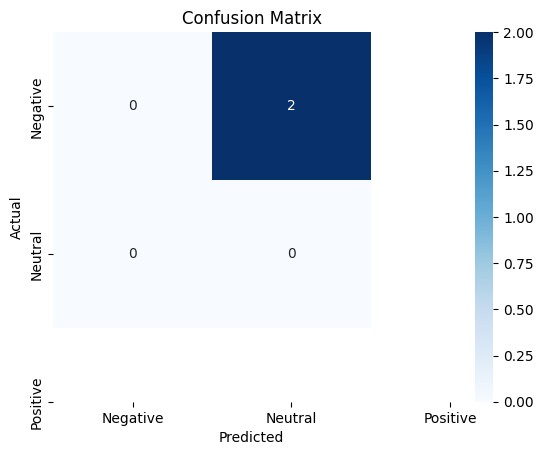

In [26]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'],
            cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

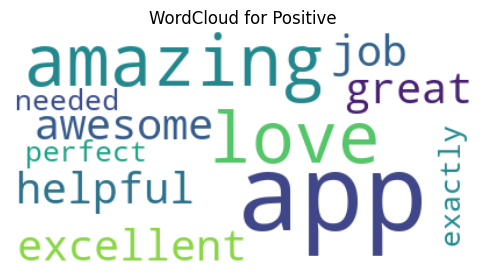

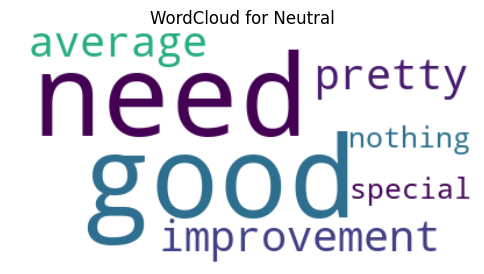

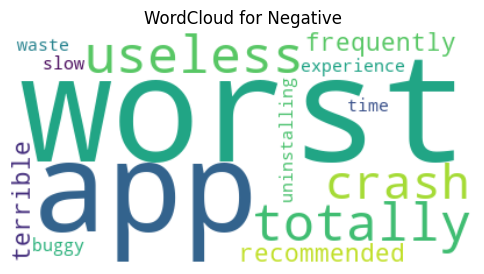

In [27]:
for sentiment in ['positive', 'neutral', 'negative']:
    text = ' '.join(df[df['sentiment'] == sentiment]['cleaned_review'])
    plt.figure(figsize=(6,4))
    plt.title(f"WordCloud for {sentiment.capitalize()}")
    wordcloud = WordCloud(background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

Sentiment Analysis Project – Actionable Summary - 

Objective:
To develop a sentiment analysis model that classifies user-generated text (e.g., app reviews) into Positive, Neutral, or Negative sentiments, using Natural Language Processing (NLP) and Machine Learning.

Tools & Technologies Used:
Programming Language: Python

Libraries: Pandas, Scikit-learn, NLTK, Matplotlib, Seaborn, WordCloud

ML Algorithm: Naive Bayes Classifier

NLP Techniques: Text Cleaning, Tokenization, Lemmatization, Stopword Removal, TF-IDF

Steps Performed:
Dataset Preparation

- Created a sample dataset of 10 text reviews with labeled sentiments (Positive, Neutral, Negative).

Data Preprocessing

- Removed special characters, lowercased text, removed stopwords, and applied lemmatization.

Feature Extraction

- Used TF-IDF Vectorizer to convert text into numerical features for model training.

Model Building

- Trained a Multinomial Naive Bayes classifier on the preprocessed data.

Model Evaluation

- Evaluated using Confusion Matrix and Classification Report (Precision, Recall, F1-Score).

Visualization

- Displayed Word Clouds for each sentiment class.

Visualized model performance using a heatmap of the confusion matrix.

Results:
- Successfully classified reviews into three sentiment categories.

- Demonstrated foundational understanding of NLP pipelines and text classification.

- Achieved high interpretability using simple models and clear visual outputs.